In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.cm as cm


In [102]:
#System definition
def xdot(y, t):
    x1, x2 = y
    return [2*x2, -2*x1 + 0.5 * (1 - x1**2)*x2]

def get_sigma_intersection(x : np.ndarray, y : np.ndarray):
    """
    Returns the array of x values where the solution
    hits the surface defined as the following
    $\Si = \{(x, y) : x \in [1, 3], y = 0\}$
    
    Parameters
    ----------
    x : np.ndarray
        The array of x positions for the solution
    
    y : np.ndarray
        The array of y positions for the solution
    """
    Sigma = 0 #Crude definition of the surface
     
    eps = 0.001 #Float tolerance
    
    xarr = []
    for i in range(len(y) - 1):
        if abs(y[i] - Sigma) < eps and y[i+1] < Sigma:
            xarr.append(x[i])
    
    return xarr

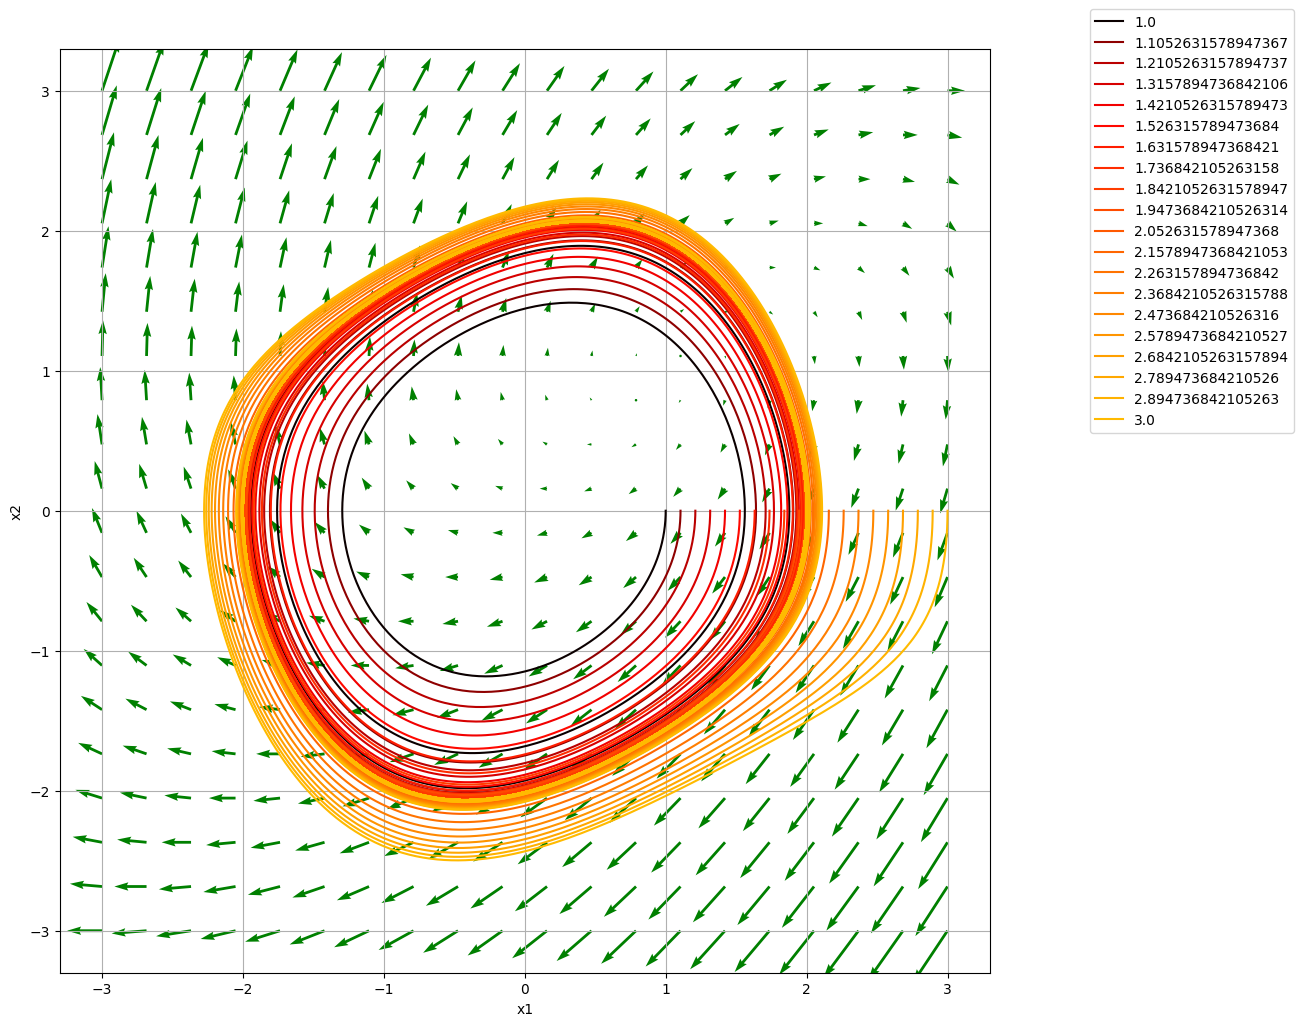

In [112]:

#define time range
timespan = (0., 500.)
init = 20 #number of initial conditions

#initial conditions
x0s = np.linspace(1, 3, init)
y0 = 0.0
i = 0
max_len = 0
xpts = np.zeros((init, 50)) #Points inside the surface
colors = np.linspace(0, 1 / max(max(x0s), 1), init)
fig, axs = plt.subplots(1, 1, figsize =(12, 12))

for x0 in x0s:
    initial_conditions = [x0, y0]
#Getting numerical Solution

    sol = solve_ivp(lambda t, y: xdot(y, t), t_span=timespan,
                    y0=initial_conditions, max_step = 0.01)
    #Picking coords of solution
    x, y = sol.y
    axs.plot(x, y, color = cm.hot(min(colors[i]**0.4, 0.7)), label = x0)
    sigma_intersection = get_sigma_intersection(x, y)
    
    max_len = max(max_len, len(sigma_intersection))
    xpts[i, :len(sigma_intersection)] = sigma_intersection 
    i+=1
    
    
#resizing xpts array
xpts = xpts[:, :max_len]

bounds = 3
#Vector Field meshes
xvect, yvect = np.meshgrid(np.linspace(-bounds, bounds, 20),
                           np.linspace(-bounds, bounds, 20))

#Update vector fields
uvect = -1 + yvect
vvect = yvect - xvect

# Plotting Vector Field
axs.quiver(xvect, yvect, uvect, vvect, color='g')

axs.grid(True)

axs.set_xlabel("x1")
axs.set_ylabel("x2")
axs.legend(bbox_to_anchor=(1.1, 1.05))

# Show plot with grid
plt.show()

In [113]:
xpts

array([[1.        , 0.9999995 , 2.00064357, 2.00064352, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.10526316, 1.10526271, 2.00064361, 2.00064365, 2.00064368,
        2.0006437 , 2.00064372, 2.00064374, 2.00064375, 2.00064375,
        2.00064375, 2.00064374, 2.00064373, 2.00064371],
       [1.21052632, 1.2105259 , 2.00063789, 2.00064375, 2.00064374,
        2.00064372, 2.0006437 , 2.00064368, 2.00064365, 2.00064361,
        2.00064357, 2.00064352, 0.        , 0.        ],
       [1.31578947, 1.31578909, 2.00063934, 2.00064374, 2.00064372,
        2.0006437 , 2.00064367, 2.00064364, 2.00064361, 2.00064356,
        2.00064352, 0.        , 0.        , 0.        ],
       [1.42105263, 1.42105228, 2.00064371, 2.00064373, 2.00064374,
        2.00064375, 2.00064375, 2.00064375, 2.00064374, 2.00064372,
        2.0006437 , 2.00064368, 2.00064364, 2.00064361],
       [1.52631579, 1.52631546, 2.0

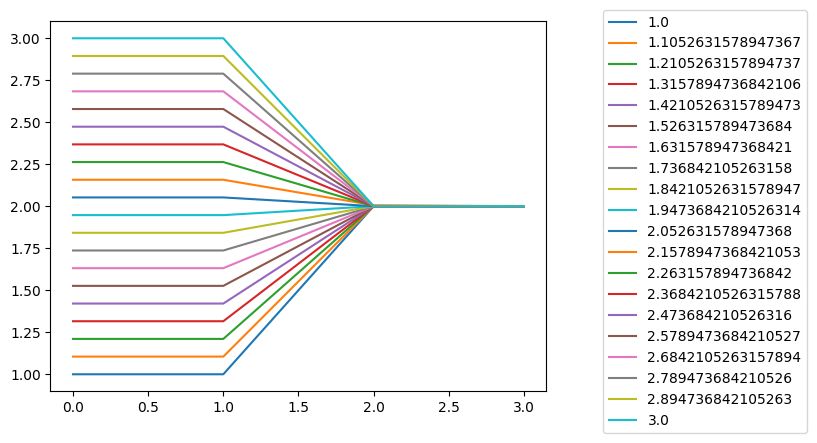

In [116]:
#Fixing xpts so lines which end before max len are constant
for x in xpts:
    indices = np.where(x == 0)
    
    #Check if we need to do anything
    if indices[0].shape[0] == 0:
        continue
        
    #previous number to fill array
    const = x[indices[0][0] - 1]

#    for index in indices[0]:
#        x[index] = const

for x in xpts:
    plt.plot(x[:4], label=x[0])

plt.legend(bbox_to_anchor=(1.1, 1.05))

In [78]:
index = np.where(xpts[2] == 0)
index[0][0]

2